Travelling salesman problem

Developer: Tanmoy Das
Date: July 10, 2024

# Model Formulation and Pyomo implementation

In [1]:
# Example Usage
from tsp_model import TravelingSalesmanProblem
num_cities = 20
tsp = TravelingSalesmanProblem(num_cities)
distance_matrix = tsp.generate_distance_matrix()
model = tsp.create_model()
route = tsp.solve()
tsp.print_route(route)

result.Solver.status result.Solver.status=<SolverStatus.ok: 'ok'>
Optimal Route:
City 1 -> City 17
City 2 -> City 14
City 3 -> City 15
City 4 -> City 1
City 5 -> City 6
City 6 -> City 12
City 7 -> City 13
City 8 -> City 16
City 9 -> City 18
City 10 -> City 5
City 11 -> City 7
City 12 -> City 8
City 13 -> City 3
City 14 -> City 10
City 15 -> City 2
City 16 -> City 9
City 17 -> City 20
City 18 -> City 19
City 19 -> City 4
City 20 -> City 11


# Draw Network

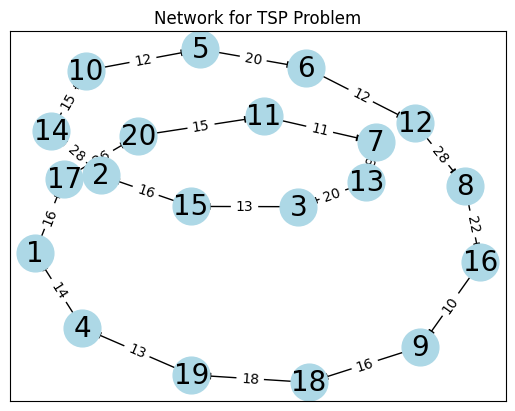

' The figure might have weird shape since we directly considered distance between cities, \nrather than coordinates and then calculate distance '

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.DiGraph()

# Add nodes
for i in range(1, num_cities):
    G.add_node(i)

# Add edges with weights
for r in route:
    #print(route)
    #print(r[0], r[1])
    G.add_edge(r[0], r[1], weight=distance_matrix[r[0]-1, r[1]-1])
    #G.add_edge(r[0], r[1], weight=distance_matrix[r[0], r[1]])

# Get positions for all nodes
pos = nx.spring_layout(G)

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

# Draw the edges
for r in route:
    edges = [(r[i], r[i + 1]) for i in range(len(r) - 1)]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='black', arrows=True)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

# Draw edge labels
edge_labels = {(r[0], r[1]): distance_matrix[r[0]-1, r[1]-1] for r in route}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Display the plot
plt.title("Network for TSP Problem")
plt.show()
""" The figure might have weird shape since we directly considered distance between cities, 
rather than coordinates and then calculate distance """

In [3]:
# distance_matrix#[1,10]

# Call Custom Genetic Algorithm for TSP

In [4]:
from genetic_algorithm_tsp import GeneticAlgorithmTSP 
import numpy as np
# !jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

# Parameters for the GA
pop_size = 100
num_generations = 500
mutation_rate = 0.01

# data 
num_cities = 10
# Generate a random distance matrix for the GA
distance_matrix = np.random.randint(10, 100, size=(num_cities, num_cities))
np.fill_diagonal(distance_matrix, 0)  # Distance from a city to itself is 0

# Solve TSP using the Genetic Algorithm
ga_tsp_solver = GeneticAlgorithmTSP(distance_matrix, pop_size, num_generations, mutation_rate)
best_path, best_distance = ga_tsp_solver.evolve_population()

print("\nBest Path:", best_path)
print("Best Distance:", best_distance)

Initial population:  [[5, 0, 8, 7, 3, 4, 6, 2, 9, 1], [1, 5, 0, 8, 7, 3, 4, 6, 2, 9], [6, 3, 4, 2, 5, 7, 0, 8, 9, 1], [9, 1, 8, 6, 3, 4, 2, 5, 7, 0], [2, 1, 7, 3, 8, 4, 5, 9, 0, 6], [3, 1, 8, 4, 5, 9, 0, 6, 7, 2], [0, 3, 4, 5, 8, 6, 9, 2, 7, 1], [7, 1, 0, 4, 3, 5, 8, 6, 9, 2], [5, 3, 6, 4, 7, 1, 2, 8, 0, 9], [0, 8, 5, 9, 3, 2, 6, 4, 7, 1], [5, 7, 6, 4, 1, 9, 0, 8, 2, 3], [3, 4, 7, 5, 6, 0, 9, 8, 2, 1], [1, 0, 3, 6, 8, 7, 2, 9, 4, 5], [7, 9, 1, 2, 5, 4, 8, 0, 3, 6], [6, 4, 0, 3, 1, 7, 2, 5, 9, 8], [3, 1, 0, 7, 2, 8, 5, 9, 4, 6], [7, 1, 9, 0, 8, 5, 6, 4, 3, 2], [4, 2, 6, 9, 7, 1, 0, 8, 5, 3], [3, 8, 2, 7, 6, 9, 0, 5, 4, 1], [6, 5, 1, 8, 9, 0, 4, 2, 3, 7], [1, 2, 9, 0, 6, 4, 5, 3, 8, 7], [8, 3, 7, 1, 4, 2, 5, 0, 9, 6], [7, 1, 5, 9, 0, 3, 2, 4, 8, 6], [3, 1, 2, 9, 0, 4, 6, 8, 7, 5], [5, 9, 6, 7, 2, 3, 8, 0, 4, 1], [0, 5, 8, 4, 9, 1, 7, 2, 6, 3], [4, 8, 6, 7, 1, 3, 5, 2, 0, 9], [0, 9, 4, 2, 8, 7, 5, 3, 6, 1], [1, 5, 2, 9, 0, 3, 4, 8, 6, 7], [9, 7, 0, 2, 1, 3, 5, 4, 8, 6], [3, 7, 5, 2, 6, 4,


Aprroximation Tour: [0, 1, 3, 4, 2, 4, 5, 0]
Approximation Tour Cost: 198


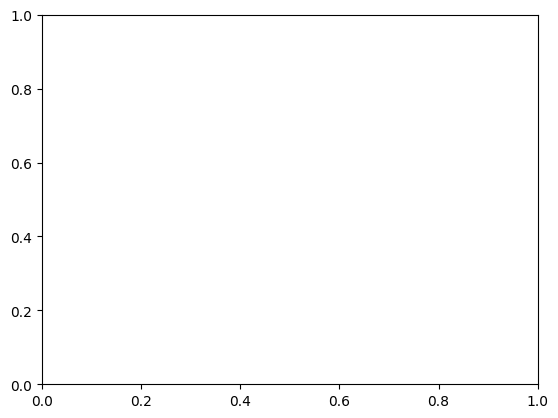

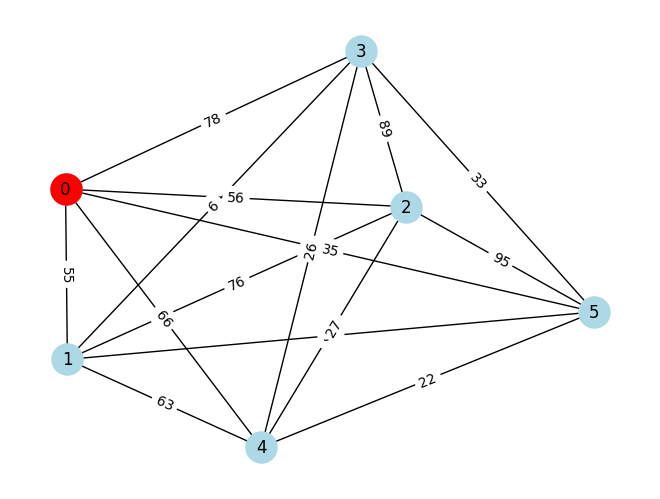

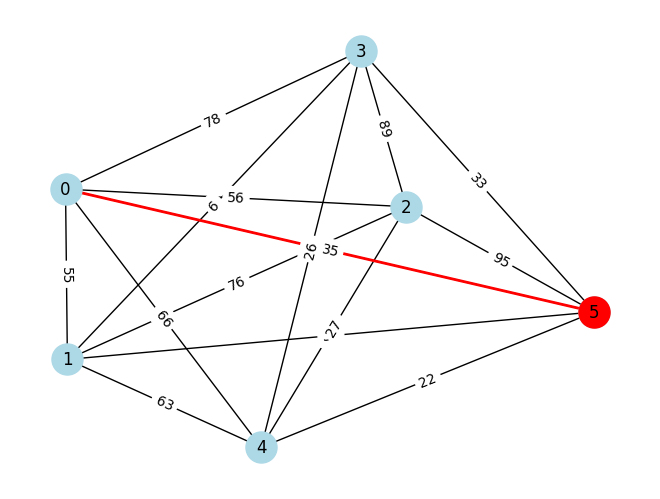

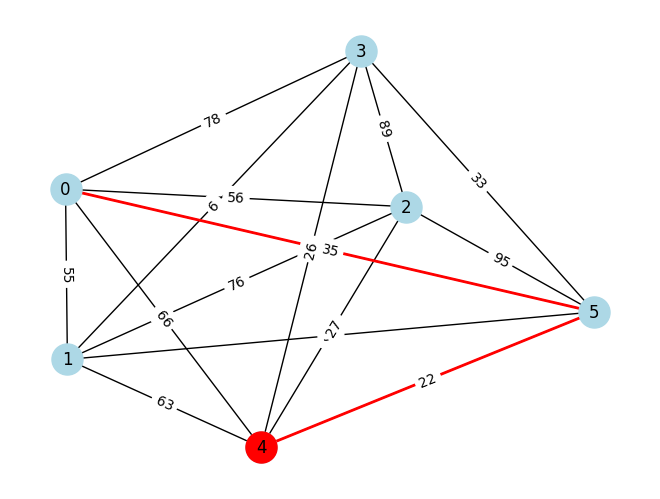

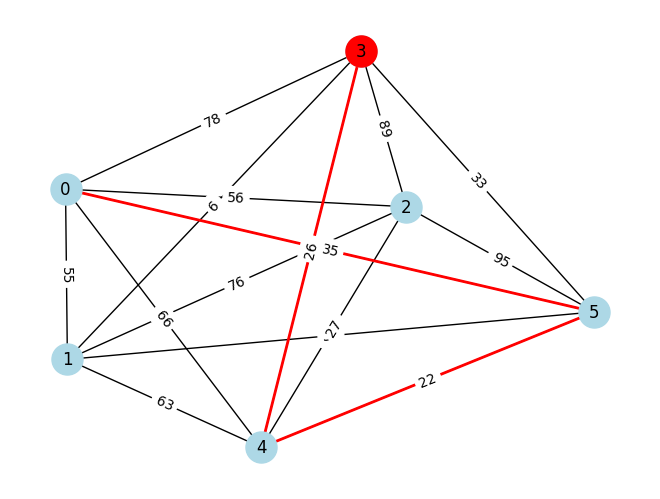

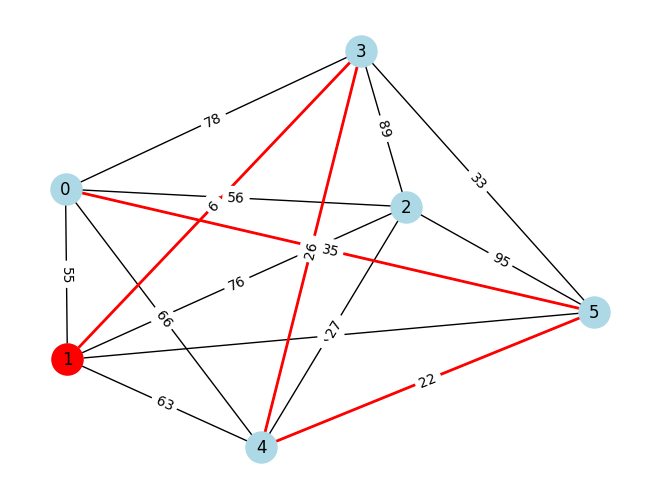

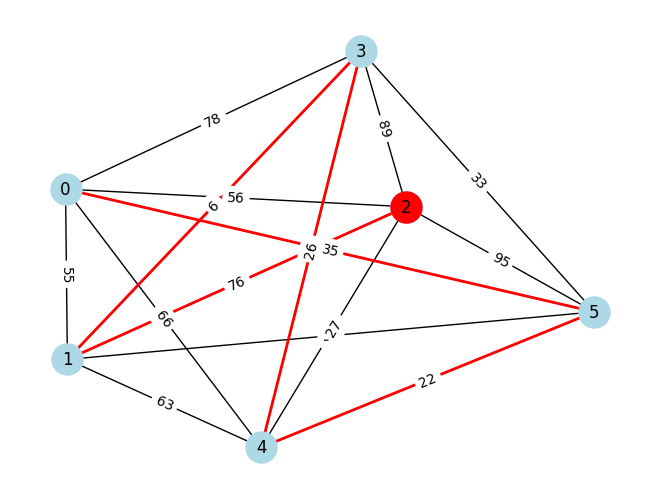

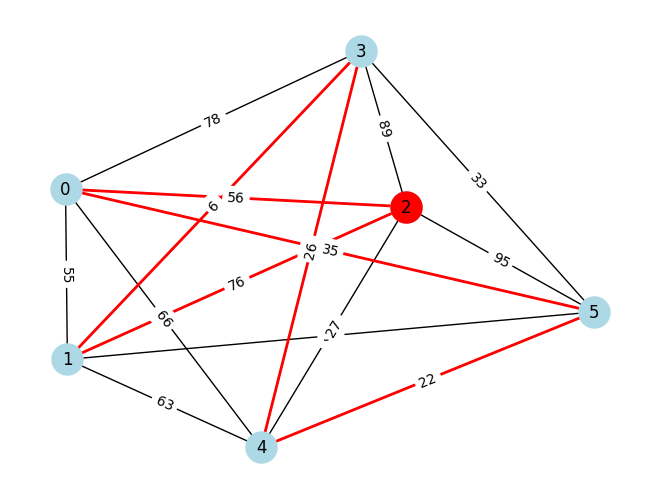


Contructive Heuristic Tour: [0, 5, 4, 3, 1, 2, 0]
Constructive Heuristic Tour Cost: 221


In [5]:
import random

import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms.approximation import traveling_salesman_problem

fig, ax = plt.subplots()

def generate_complete_graph(num_nodes, weight_range=(1, 100)):
    G = nx.complete_graph(num_nodes)
    for u, v in G.edges():
        G.edges[u, v]["weight"] = random.randint(*weight_range)
    return G


def plot_graph_step(G, tour, current_node, pos):
    #plt.clf()

    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500)
    path_edges = list(zip(tour, tour[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="red", width=2)
    nx.draw_networkx_nodes(
        G, pos, nodelist=[current_node], node_color="red", node_size=500
    )

    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.pause(0.5)


def calculate_tour_cost(G, tour):
    return sum(G[tour[i]][tour[i + 1]]["weight"] for i in range(len(tour) - 1))


def nearest_neighbor_tsp(G, start_node=None):
    if start_node is None:
        start_node = random.choice(list(G.nodes))

    pos = nx.spring_layout(G)
    plt.ion()
    plt.show()

    unvisited = set(G.nodes)
    unvisited.remove(start_node)
    tour = [start_node]
    current_node = start_node

    plot_graph_step(G, tour, current_node, pos)

    while unvisited:
        next_node = min(unvisited, key=lambda node: G[current_node][node]["weight"])
        unvisited.remove(next_node)
        tour.append(next_node)
        current_node = next_node

        plot_graph_step(G, tour, current_node, pos)

    tour.append(start_node)
    plot_graph_step(G, tour, current_node, pos)

    print(f"\nContructive Heuristic Tour: {tour}")
    tour_cost = calculate_tour_cost(G, tour)
    print(f"Constructive Heuristic Tour Cost: {tour_cost}")

    plt.ion()
    plt.show()


if __name__ == "__main__":
    G = generate_complete_graph(6)

    approx_tour = traveling_salesman_problem(G, cycle=True)
    approx_tour_cost = calculate_tour_cost(G, approx_tour)

    print(f"\nAprroximation Tour: {approx_tour}")
    print(f"Approximation Tour Cost: {approx_tour_cost}")

    nearest_neighbor_tsp(G, 0)

In [6]:
import itertools

def tsp_dp(graph):
    n = len(graph)
    # memo table to store minimum cost of visiting all nodes in a subset ending at a particular node
    memo = {}

    # Initialize memo table for the subsets of size 1 (starting from node 0)
    for i in range(1, n):
        memo[(1 << i, i)] = graph[0][i]

    # Iterate over subsets of increasing size (overlapping recursive case) 
    for subset_size in range(2, n):
        for subset in itertools.combinations(range(1, n), subset_size):
            bits = 0
            for bit in subset:
                bits |= 1 << bit
            for j in subset:
                prev_bits = bits & ~(1 << j)
                min_dist = float('inf')
                for k in subset:
                    if k == j:
                        continue
                    current_dist = memo[(prev_bits, k)] + graph[k][j]
                    if current_dist < min_dist:
                        min_dist = current_dist
                memo[(bits, j)] = min_dist

    # Complete the tour by returning to the starting node
    bits = (1 << n) - 2
    min_dist = float('inf')
    for i in range(1, n):
        current_dist = memo[(bits, i)] + graph[i][0]
        if current_dist < min_dist:
            min_dist = current_dist

    return min_dist

# Example usage:
graph = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

print("The minimum cost to visit all cities is:", tsp_dp(graph))


The minimum cost to visit all cities is: 80


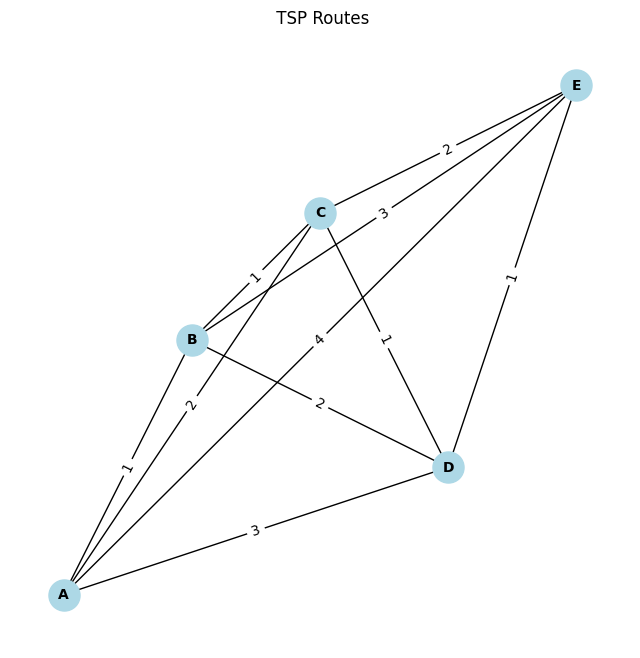

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Define the graph
G = nx.Graph()

# Add nodes (cities)
cities = ['A', 'B', 'C', 'D', 'E']
positions = {'A': (0, 0), 'B': (1, 2), 'C': (2, 3), 'D': (3, 1), 'E': (4, 4)}
G.add_nodes_from(cities)

# Add edges with distances (for TSP, the graph is typically complete)
edges = [
    ('A', 'B', 1), ('A', 'C', 2), ('A', 'D', 3), ('A', 'E', 4),
    ('B', 'C', 1), ('B', 'D', 2), ('B', 'E', 3),
    ('C', 'D', 1), ('C', 'E', 2),
    ('D', 'E', 1)
]
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Define multiple routes (solutions to TSP)
routes = [
    ['A', 'B', 'C', 'D', 'E', 'A'],
    ['A', 'C', 'B', 'D', 'E', 'A'],
    ['A', 'D', 'B', 'C', 'E', 'A']
]

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 8))
nx.draw(G, pos=positions, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})

# Initialize the routes to be animated
colors = ['r', 'g', 'b']
lines = []

for color in colors:
    line, = ax.plot([], [], color=color, linewidth=2, alpha=0.7)
    lines.append(line)

# Update function for animation
def update(num):
    for i, route in enumerate(routes):
        edges_in_route = [(route[j], route[j + 1]) for j in range(num)]
        x_coords = []
        y_coords = []
        for edge in edges_in_route:
            x_coords.extend([positions[edge[0]][0], positions[edge[1]][0], None])
            y_coords.extend([positions[edge[0]][1], positions[edge[1]][1], None])
        lines[i].set_data(x_coords, y_coords)
    return lines

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(cities), interval=1000, blit=True, repeat=True)

plt.title(' TSP Routes')
plt.savefig('tsp.tif')
plt.show()


['Miami', 'Naples', 'Sarasota', 'Tampa', 'Orlando', 'Jacksonville', 'Tallahassee', 'Pensacola', 'West Palm Beach', 'Fort Lauderdale', 'Miami']


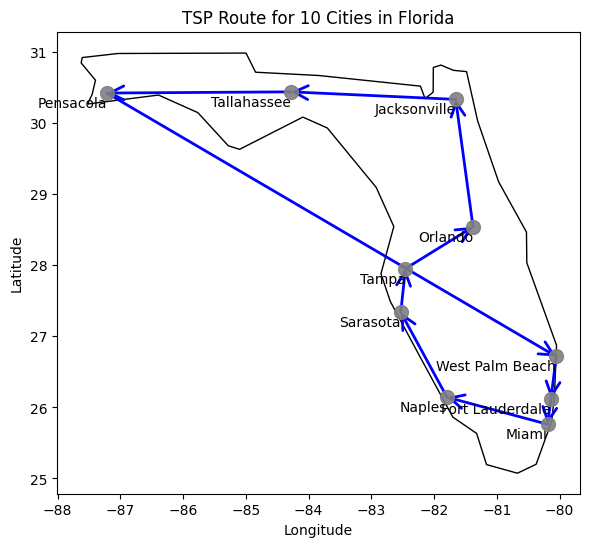

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
from math import sqrt

# Step 1: Define the cities and their coordinates
cities = {
    "Miami": (25.7617, -80.1918),
    "Orlando": (28.5383, -81.3792),
    "Tampa": (27.9506, -82.4572),
    "Jacksonville": (30.3322, -81.6557),
    "Tallahassee": (30.4383, -84.2807),
    "Fort Lauderdale": (26.1224, -80.1373),
    "Naples": (26.1420, -81.7948),
    "Pensacola": (30.4213, -87.2169),
    "Sarasota": (27.3364, -82.5307),
    "West Palm Beach": (26.7153, -80.0534)
}

# Step 2: Create a graph and add nodes
#fig, ax = plt.subplots(figsize=(8, 8))
G = nx.Graph()
for city, coords in cities.items():
    G.add_node(city, pos=coords)

# Step 3: Add edges with distances (using Euclidean distance for simplicity)
def euclidean_distance(coord1, coord2):
    return sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

for city1, coord1 in cities.items():
    for city2, coord2 in cities.items():
        if city1 != city2:
            G.add_edge(city1, city2, weight=euclidean_distance(coord1, coord2))
#nx.draw(G)
#plt.show()
# Step 4: Solve the TSP using a heuristic approach
from networkx.algorithms.approximation import traveling_salesman_problem
tsp_route = traveling_salesman_problem(G, cycle=True)
print(tsp_route)

# Step 5: Plot the TSP route on a GIS map
# Load the shapefile of US states
states = gpd.read_file('../data/ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp')


# Filter for Florida (assuming 'name' column contains state names)
florida = states[states['name'] == 'Florida']

fig, ax = plt.subplots(figsize=(6, 6))
florida.plot(ax=ax, color='white', edgecolor='black')

# Plot cities
x = [cities[city][1] for city in cities]
y = [cities[city][0] for city in cities]
plt.scatter(x, y, c='gray', marker='o', s=100, alpha=0.9, zorder=4)

# Annotate cities
for city, (lat, lon) in cities.items():
    plt.text(lon, lat-0.2, city, fontsize=10, ha='right')

# Plot TSP route    
route_coords = [cities[city] for city in tsp_route]
for i in range(len(route_coords) - 1):
    start = route_coords[i]
    end = route_coords[i + 1]
    plt.annotate(
        '', xy=(end[1], end[0]), xytext=(start[1], start[0]),
        arrowprops=dict(arrowstyle="->,head_width=0.5,head_length=1", color='blue', lw=2, 
                        shrinkA=0, shrinkB=0),
        zorder=2
    )

plt.title('TSP Route for 10 Cities in Florida')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(False)
plt.tight_layout()
plt.savefig('tsp_route.png')
plt.show()